## Logistic Regression Assignment

© Rashed Iqbal <br>
No part of this assignment could be used for any purposes other than for which it is intended (that is as an assignment workbook). <br>

This assignment is based upon Logistic Regression slides discussed in the class during session: 

- Rename this iPython notebook to yourlastname_logitreg.ipynb
- There are different sections in the assignment in this notebook where you will be writing code. Such places are indicated by block enclosed in START CODE HERE and END CODE HERE. In your submitted assignment, you will need to put your code ONLY in these blocks.
- After each section, there are one or more cells that checks your code by executing a command. You should get the answer indicated. 
- Number of lines of codes are for guidelines. You may exeed the number specified.

In [1]:
import numpy as np

### Loss Function
#### Assignment 1: 
Write a function called loss that takes two parameters *y* and *y<sup>^</sup>*
Here y is the actual value and yhat is the prediction of the outcome

The function returns the logistic loss -( (1-*y*)log(1-*y<sup>^</sup>*) + *y*log(*y<sup>^</sup>*))

This function will return loss for a single training example. We will use this function to 
determine cost function while calling it for NumPy vectors. 

In the code, we will use y and yhat to represent *y* and *y<sup>^</sup>*

In [1]:
# Import numpy
import numpy as np

def loss(y, yhat):
    return -((1 - y) * np.log(1-yhat) + y * np.log(yhat))


In [2]:
y = 1
yhat = 0.85
print("Loss for y = {} and yhat = {} is equal to: {:1.5f}".format(y, yhat, loss(y, yhat)))

Loss for y = 1 and yhat = 0.85 is equal to: 0.16252


#### Check Assignment 1: 
###### You should get the following result
Loss for y = 1 and yhat = 0.85 is equal to: 0.16252

### Activation Function
In Logistic Regression we use Sigmoid activation function. 
#### Assignment 2: 
Write a function called activation() that takes *y<sup>^</sup>* and returns 1/(1+ *e<sup>-yhat</sup>*) 

In [3]:
def activation(yhat):
    return 1 / (1 + np.exp(-yhat))

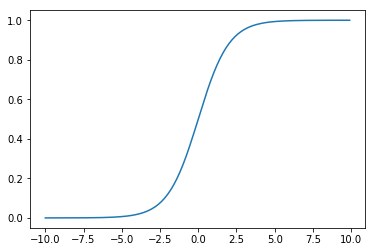

In [4]:
z = np.array(np.arange(-10,10,0.1))
zsig = activation(z)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(z, zsig)
plt.show()
#print("Output of Activation Function on Z:", zsig)

#### Check Assignment 2: 
###### Your graph should be similar to the one below 
<img src="sigmoid.png" style="float:left;">

### Input Data 

#### Assignment 3: 
In this assignment you will prepare input data. You will create a feature matrix X of shape (4, 3). Note that these are three training examples for four features 

1 &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp; 1<br>
1 &nbsp; &nbsp; &nbsp; 1 &nbsp; &nbsp; &nbsp; 0<br>
1 &nbsp; &nbsp; &nbsp; 2 &nbsp; &nbsp; &nbsp; 1<br>
1 &nbsp; &nbsp; &nbsp; 0 &nbsp; &nbsp; &nbsp; 2<br>

Next you will create an outcome vector Y of shape (1, 4): <br>
[ 0 &nbsp; &nbsp; &nbsp; 1 &nbsp; &nbsp; &nbsp; 0 ]

- Both of the above will be numpy arrays. Make sure your shapes are correct.
- Variables number of training examples *m* and number of features *n* are defined below. Use them in your code.


In [5]:
# Inputs
# training examples
m = 3
# number of features
n = 4

### START CODE HERE ### (≈ 2-5 lines of code)
# This is the feature matrix X where n features of each of m training 
# examples are stacked vertically (n x m).

X = np.array([[1, 2, 1], [1, 1, 0], [1, 2, 1], [1, 0, 2]])

# This is the outcome (or dependent variable) Y. Note that shape of 
# this matrix is (1 x m)
Y = np.array([[0, 1, 0]])

### END CODE HERE ###

In [6]:
print("X=\n", X)
print("\nY=\n", Y)

X=
 [[1 2 1]
 [1 1 0]
 [1 2 1]
 [1 0 2]]

Y=
 [[0 1 0]]


#### Check Assignment 3: 
###### Your output should be:

X= <br>
 [[1&nbsp; &nbsp;2&nbsp; &nbsp;1] <br>
 [1&nbsp; &nbsp;1&nbsp; &nbsp;0] <br>
 [1&nbsp; &nbsp;2&nbsp; &nbsp;1] <br>
 [1&nbsp; &nbsp;0&nbsp; &nbsp;2]]

Y=
 [[0&nbsp; &nbsp;1&nbsp; &nbsp;0]]


### Initialization  

#### Assignment 4: 
In this assignment, you will:
- create and initialize W and b to ones. Here, W is the (1,n) shape weight vector and b is the scalar bias.  
- create and initialize J and Yhat to zeros. J is cost function vector of size (1,h) that will hold cost function for each iteration. Yhat is the (1,m) vector to hold prediction for all training examples. 
- Note that number of iterations h and the learning rate alpha have been initialized for you. 


In [7]:
#Iterations
h = 100000
alpha = 0.05

### START CODE HERE ### (≈ 2-5 lines of code)
# Model Parameters
b = 1
W = np.zeros(n).reshape(1, n)
 
# Initialization of J and Yhat
J = np.zeros(h).reshape(1, h)
Yhat = np.zeros(m).reshape(1, m)
### END CODE HERE ###


In [8]:
print("Shape of W:", W.shape)
print("Shape of J:", J.shape)
print("Sum of all elements of W:", np.sum(W))
print("Sum of all elements of J:", np.sum(J))

Shape of W: (1, 4)
Shape of J: (1, 100000)
Sum of all elements of W: 0.0
Sum of all elements of J: 0.0


#### Check Assignment 4: 
###### You should get the following results
Shape of W: (1, 4) <br>
Shape of J: (1, 100000) <br>
Sum of all elements of W: 0.0 <br>
Sum of all elements of J: 0.0 <br>

### Implementation of Logistic Regression Using Loops
In this assignment you will use loops to implement Logistics. Your implementation may vary but below is a possible list of loops:

- There will be an outer most loop for iterations of Gradient Descent.
- There will be a second loop for determining predictions and cost function over 
- There will be multiple innner loops for summing over weights 

#### Assignment 5: 
Implement Logistic Regression/Gradient Descent using loops.  

In [9]:
for j in range(h):
### START CODE HERE ### (≈ 20-30 lines of code)
    dJdw = np.zeros((1,n))
    Jcost = 0
    dJdb = 0
    for i in range(m):
        Yhat[0,i] = 0
        for k in range(n):
            Yhat[0,i] += W[0,k] * X[k,i]
        Yhat[0,i] += b
        Yhat[0,i] = activation(Yhat[0,i])
        Jcost += loss(Y[0,i],Yhat[0,i])
        dJ  = Yhat[0,i] - Y[0,i]
        dJdb += dJ  
        for k in range(n):
            dJdw[0,k] += dJ * X[k,i]
    dJdb = dJdb/m
    for k in range(n):
        dJdw[0,k] = dJdw[0,k]/m
    J[0,j] = Jcost/m
    b = b - alpha * dJdb
    for k in range(n):
        W[0,k] -= alpha* dJdw[0,k]
### END CODE HERE ###

In [10]:
print("Jcost = {}".format(J[0,h-1]))
print("b = {}".format(b))
print("W = ", W)

Jcost = 0.00038577170351032734
b = -1.794089512132135
W =  [[ 2.89098637 -2.11039808  2.89098637 -9.16285683]]


#### Check Assignment 4 (first check): 
###### You should get the following results

Jcost = 0.00038577170351032734 <br>
b = -1.794089512132135 <br>
W =  [[ 2.89098637 &nbsp; -2.11039808 &nbsp; 2.89098637 &nbsp; -9.16285683]]

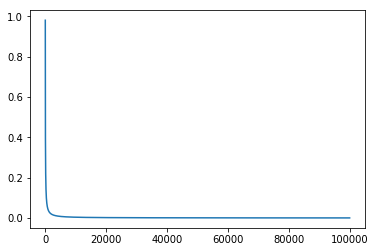

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(J[0,])
plt.show()

#### Check Assignment 4 (second check): 
###### Your graph should be similar to the one below 
<img src="costfunc.png" style="float:left;" height=400 width=400>

### Implementation of Logistic Regression Using Linear Algebra (Matrix Operations)
In this assignment you will use linear algebra to implement Logistics. Your implementation 
may vary but below is a possible list:

- There will be an outer most loop for iterations of Gradient Descent as the case with implementation using loops. This will be the ONLY loop in this implmentation.
- Use matrix operations to implement the remaining operations.

#### Assignment 6: 
Implement Logistic Regression/Gradient Descent using Linear Algebra.  

##### Initialization: 
Use the same code block from Assignment 4 below.  

In [42]:
#Iterations
h = 100000
alpha = 0.05

### START CODE HERE ### (≈ 2-5 lines of code)
# Model Parameters
b = 1
W = np.zeros(n).reshape(1, n)
 
# Initialization of J and Yhat
J = np.zeros(h).reshape(1, h)
Yhat = np.zeros(m).reshape(1, m)
### END CODE HERE ###

##### Logistic Regression using Linear Algebra: 

In [43]:
for g in range(h):
### START CODE HERE ### (≈ 4-10 lines of code)
    Yhat = activation(np.matmul(W, X) + b)
    J[0, g] = -1 / m * np.sum(Y * np.log(Yhat) + (1 - Y) * np.log(1 - Yhat))
    dJdz = Yhat - Y
    dJdb = np.sum(dJdz) / m
    dJdw = 1 / m * np.matmul(dJdz, np.transpose(X))
    b -= alpha * dJdb
    W -= alpha * dJdw
### END CODE HERE ###

In [44]:
print("Jcost = {}".format(J[0,h-1]))
print("b = {}".format(b))
print("W = ", W)

Jcost = 0.00038577170351032734
b = -1.794089512132135
W =  [[ 2.89098637 -2.11039808  2.89098637 -9.16285683]]


#### Check Assignment 6: 
###### You should get the following results

Jcost = 0.00038577170351032734 <br>
b = -1.794089512132135 <br>
W =  [[ 2.89098637 &nbsp; -2.11039808 &nbsp; 2.89098637 &nbsp; -9.16285683]]